<a href="https://colab.research.google.com/github/dilp90/PDI/blob/main/Procesamiento_a_color/PDI_Segmentacion_a_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Segmentación de un color en una imagen en escala RGB**

In [1]:
# Librerías
import cv2
import numpy as np
import matplotlib.pyplot as plt

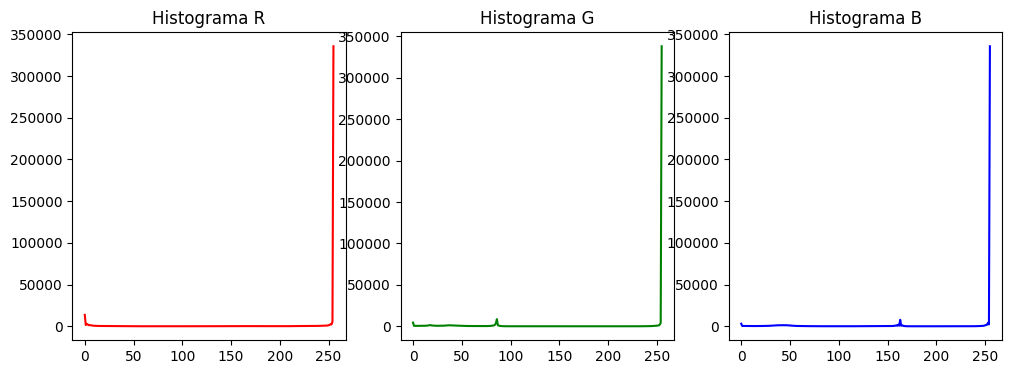

In [6]:
# Cargar la imagen
image = cv2.imread("spiderman.jpg")  # Reemplazar con la imagen correcta
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Descomponer en los canales RGB
R, G, B = cv2.split(image)

# Calcular histogramas usando cv2.calcHist
# cv2.calcHist(images, channels, mask, histSize, ranges)
hist_R = cv2.calcHist([R], [0], None, [256], [0, 256])
hist_G = cv2.calcHist([G], [0], None, [256], [0, 256])
hist_B = cv2.calcHist([B], [0], None, [256], [0, 256])

# Mostrar histogramas
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(hist_R, color='red')
plt.title('Histograma R')
plt.subplot(1, 3, 2)
plt.plot(hist_G, color='green')
plt.title('Histograma G')
plt.subplot(1, 3, 3)
plt.plot(hist_B, color='blue')
plt.title('Histograma B')
plt.show()


# **¿Cómo se realiza el procesamiento a una imagen RGB para segmentar un solo color?**

**1. Promedio de los canales RGB para conversión a escala de grises**

Cada píxel en una imagen a color tiene tres valores: uno para el canal Rojo (R), uno para el canal Verde (G) y otro para el canal Azul (B).

Para convertirlo en escala de grises, tomamos el promedio de los tres valores en cada píxel:

Gris = (R + G + B) / 3

Nota: Convertimos los valores a `float32` antes de la suma para evitar problemas de desbordamiento numérico.


**2. Definición de umbral para segmentación de color rojo**

Este bloque tiene el objetivo de crear una máscara binaria (`mask_red`) que detecte las regiones de la imagen que son predominantemente de color rojo.
1. Se define un umbral para el canal rojo (R) (Consideramos que un píxel es rojo si su valor en el canal rojo es mayor a 120).
2. Define un umbral común para los canales verde (G) y azul (B) (Para que un píxel se considere rojo, sus valores en los canales verde y azul deben ser bajos, menores a 100).
3. Se genera una máscara lógica que:

  *   Es verdadera si: el valor en R es mayor a 120 Y el valor en G es menor a 100 Y el valor en B es menor a 100.
  *   Es falsa si: esto no se cumple.



**3. Creación de imagen reultante con rojo resaltado**

Se crea una nueva imagen (`result`) con las mismas dimensiones que image, pero llena de ceros (es decir, completamente negra).

El objetivo es:

* Mantener el color rojo original en los píxeles que cumplen con la máscara (mask_red).

* Convertir a escala de grises todos los píxeles que no son rojos.

En la línea:
`result[:, :, 0] = np.where(mask_red, R, gray_image)`

El canal rojo (R) de la imagen resultante se llena con:
* R (el rojo original) si el píxel es rojo (mask_red == True),
* gray_image (el valor en escala de grises) si no es rojo.

In [7]:
# Promediar los valores de los canales RGB para obtener una imagen en escala de grises
gray_image = (R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3
gray_image = gray_image.astype(np.uint8)

# Definir el umbral para segmentar el color rojo
# Se asume que el rojo tiene un alto valor en R y bajo en G y B
umbral_R = 120
umbral_GB = 100
mask_red = (R > umbral_R) & (G < umbral_GB) & (B < umbral_GB)

# Crear la imagen final donde el rojo se mantiene y lo demás es gris
result = np.zeros_like(image)
result[:, :, 0] = np.where(mask_red, R, gray_image)
result[:, :, 1] = np.where(mask_red, G, gray_image)
result[:, :, 2] = np.where(mask_red, B, gray_image)

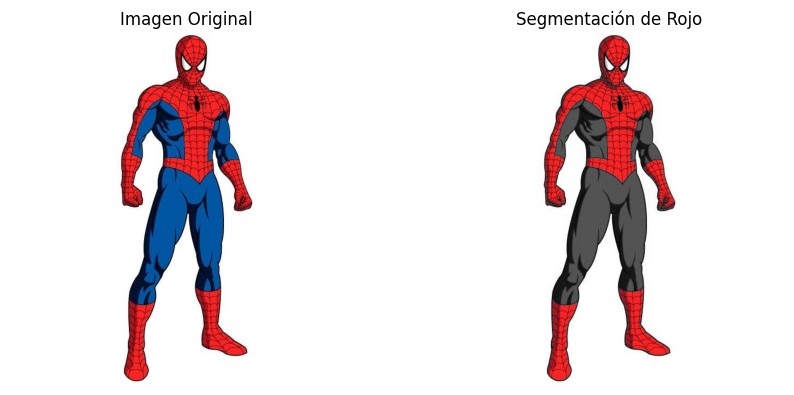

650

In [8]:
# Mostrar imágenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Segmentación de Rojo")
plt.axis("off")

plt.show()

len(mask_red)